### Семинар 8: Классификация изображений

Датасет `load_digits` - это набор картинок рукописных цифр. Это модельный наборов данных для обучения методам классификации изображений. Его можно получить с помощью стандартных средств sklearn:

In [214]:
import  numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
numbers = load_digits()

Познакомимся с описанием и структурой датасета:

In [215]:
print(numbers.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

Признаки обозначим `X`, а `у` - столбец с номерами классов. 

In [216]:
X = numbers.data
y = numbers.target

Выведем информацию о количественных параметрах датасета:

In [217]:
number_of_photos, h, w = numbers.images.shape
number_of_targets = numbers.target_names.shape[0]
print('Количество фотографий: {}\nКоличество классов: {}'.format(number_of_photos, number_of_targets))
print('Размер фото: {}x{}\nРазмер датасета data: {}\n'.format(w, h, numbers.data.shape))

Количество фотографий: 1797
Количество классов: 10
Размер фото: 8x8
Размер датасета data: (1797, 64)



Важно понимать:

In [218]:
numbers.data[0].reshape(8,8)==numbers.images[0]

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True,  True]])

Выведем несколько изображений на экран, используя инструментарий библиотеки matplotlib:

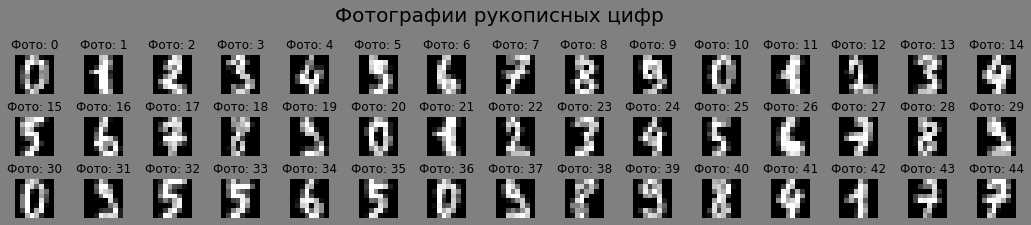

In [219]:
f=plt.figure(figsize=(18,3))
f.set(facecolor='grey')
plt.suptitle('Фотографии рукописных цифр',y = 1.1,fontsize=20)
n_row = 3
n_col = 15
for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(numbers.images[i], cmap=plt.cm.gray)
        plt.axis('off')
        plt.title('Фото: %i' % i )
f.subplots_adjust(hspace=0.6,wspace=0.6)
plt.show()

 Разделим эти данные на тестовую и обучающую выборки:

In [220]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Построим модель классификатора методом опорных векторов для идентификации цифры по изображению:

In [221]:
from sklearn.svm import SVC
#clf = SVC(kernel='linear')
clf = SVC()
clf.fit(X_train, y_train)

SVC()

Сделаем предсказание:

In [222]:
y_pred = clf.predict(X_test)

In [223]:
(y_test!=y_pred).sum()

5

Создадим таблицу DataFrame, чтобы сопоставить реальные значения с предсказанными:

In [224]:
import pandas as pd
check = pd.DataFrame({
    "y_test": y_test,
    "y_pred": y_pred,
})

check.head(10)

,y_test,y_pred
0,2,2
1,8,8
2,2,2
3,6,6
4,6,6
5,7,7
6,1,1
7,9,9
8,8,8
9,5,5


Выведем неправильно предсказанные значения:

In [225]:
check[check['y_test']!=check['y_pred']]

,y_test,y_pred
124,8,1
130,9,5
181,5,9
378,3,8
472,5,6


Выведем соответствующие им изображения:

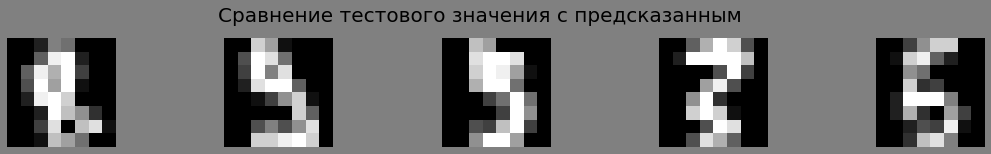

In [226]:
f=plt.figure(figsize=(18,2))
f.set(facecolor='grey')
plt.suptitle('Сравнение тестового значения с предсказанным',y = 1.1,fontsize=20)
l=len(check[check['y_test']!=check['y_pred']])
for i in range(l):
        plt.subplot(1, l, i + 1)
        plt.imshow(X_test[y_test!=y_pred][i].reshape(8,8),cmap=plt.cm.gray)
        plt.axis('off')
f.subplots_adjust(hspace=0.6,wspace=0.6)

Оценим качество модели:

In [227]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.994431185361973
0.9907407407407407


In [228]:
from sklearn import metrics

In [229]:
metrics.accuracy_score(y_pred,y_test)

0.9907407407407407

In [230]:
metrics.precision_score(y_pred,y_test, average=None)

array([1.        , 1.        , 1.        , 0.98148148, 1.        ,
       0.96491228, 1.        , 1.        , 0.98360656, 0.98245614])

In [231]:
metrics.recall_score(y_pred,y_test, average=None)

array([1.        , 0.98113208, 1.        , 1.        , 1.        ,
       0.98214286, 0.98360656, 1.        , 0.98360656, 0.98245614])

In [232]:
metrics.f1_score(y_pred,y_test, average=None)

array([1.        , 0.99047619, 1.        , 0.99065421, 1.        ,
       0.97345133, 0.99173554, 1.        , 0.98360656, 0.98245614])

In [233]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[45,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 52,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 53,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 53,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 48,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 55,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 53,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 60,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 56]])

Построим график зависимости тестовой и обучающей эффективности от размера обучающей выборки:

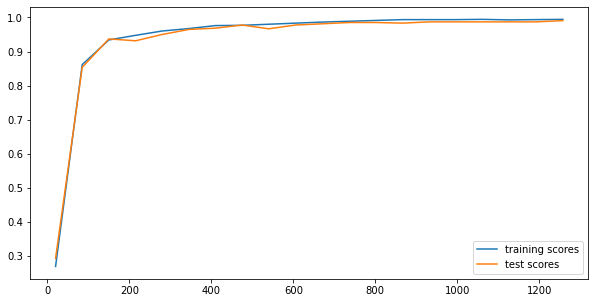

In [234]:
training_scores = []
test_scores = []
num = []

for i in np.linspace(20, len(X_train), 20):
    clf = SVC()
    X = X_train[:int(i)]
    y = y_train[:int(i)]
    clf.fit(X, y)
    num.append(int(i))
    training_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

plt.figure(figsize=(10, 5))
plt.plot(num, training_scores, label="training scores")
plt.plot(num, test_scores, label="test scores")
plt.legend();